In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import feather
from autorank import autorank, plot_stats, create_report, latex_table

In [2]:
import os
print(os.getcwd())

C:\Users\whsu014\Documents\PhD\Data\VIEW


In [3]:
#ap_scores_df = feather.read_dataframe("ap_scores.feather")
ap_scores_df = feather.read_dataframe("ap_scores_IFC_patched.feather")
print(ap_scores_df.shape)
print(ap_scores_df.columns)
print(np.round(ap_scores_df.values, decimals=3))

(100, 11)
Index(['LSTM', 'RNN', 'MLP', 'RC', 'RC (aggregated)', 'RC (last quarter)',
       'LR', 'LR (aggregated)', 'LR (last quarter)', 'Cox (aggregated)',
       'Cox (last quarter)'],
      dtype='object')
[[0.423 0.415 0.409 ... 0.412 0.414 0.41 ]
 [0.449 0.441 0.432 ... 0.436 0.44  0.431]
 [0.43  0.426 0.415 ... 0.417 0.421 0.415]
 ...
 [0.4   0.389 0.394 ... 0.394 0.398 0.39 ]
 [0.428 0.418 0.413 ... 0.413 0.419 0.408]
 [0.405 0.394 0.395 ... 0.394 0.399 0.39 ]]


In [5]:
result = autorank(ap_scores_df, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
                    meanrank      mean       std  ci_lower  ci_upper  \
LSTM                    1.42  0.425688  0.015129  0.422285  0.429091   
RC (aggregated)         3.81  0.421214  0.014563  0.417811  0.424617   
RC                      3.94  0.420684  0.014941  0.417281  0.424087   
LR (aggregated)         3.96  0.420468  0.014024  0.417065  0.423871   
RNN                     5.79  0.418110  0.015667  0.414707  0.421513   
Cox (aggregated)        6.14  0.417732  0.014230  0.414328  0.421135   
RC (last quarter)       6.29  0.417125  0.015463  0.413722  0.420528   
MLP                     7.36  0.415512  0.015007  0.412109  0.418915   
LR (last quarter)       7.98  0.414577  0.015087  0.411174   0.41798   
LR                      9.36  0.411771  0.014794  0.408368  0.415174   
Cox (last quarter)      9.95  0.411254  0.015144   0.40785  0.414657   

                   effect_size   magnitude  
LSTM                         0  negligible  
RC (aggregated)       0.30

c:\users\whsu014\appdata\local\programs\python\python36\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


In [6]:
create_report(result)

The statistical analysis was conducted for 11 populations with 100 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.257). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.995) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. If the results of the ANOVA test are significant, we use the post-hoc Tukey HSD test to infer which differences are significant. We report the mean value (M) and the standard deviation (SD) for each population. Populations are significantly different if their conf

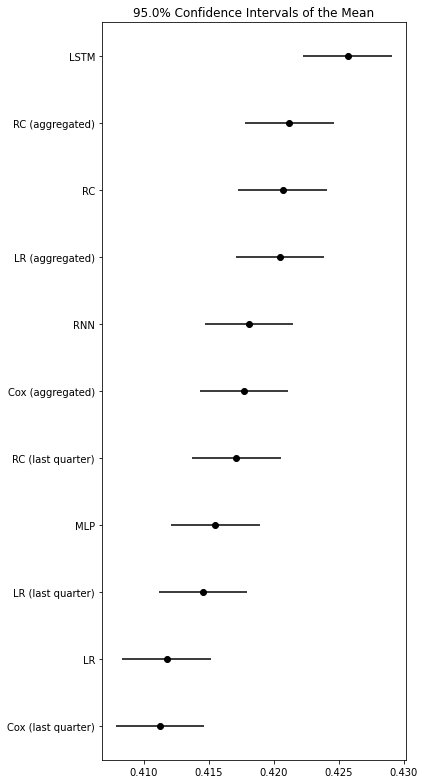

In [8]:
#plt.figure(figsize=(5, 10))

plot_stats(result)
plt.tight_layout()
figname = "Plots/CVD_EVENT_Confidence_Intervals_of_the_mean.png"
#plt.savefig(figname)
plt.show()

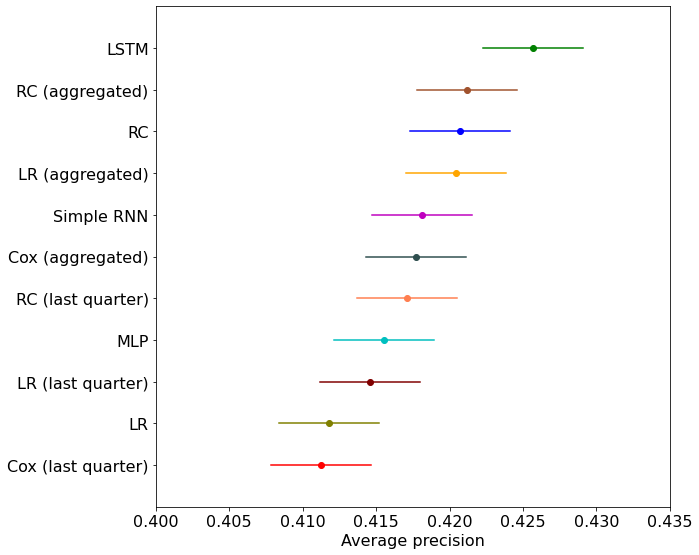

In [16]:
plt.rcParams.update({'font.size':16})

plt.figure(figsize=(10, 8))
plt.ylim([0, 12])
plt.xlim([0.400, 0.435])

plt.yticks([1,2,3,4,5,6,7,8,9,10,11],
           ["Cox (last quarter)", 
            "LR", "LR (last quarter)",  
            "MLP", "RC (last quarter)", 
            "Cox (aggregated)", "Simple RNN", 
            "LR (aggregated)", "RC", 
            "RC (aggregated)", "LSTM"])

plt.xticks([0.400, 0.405, 0.410, 0.415, 0.420, 0.425, 0.430, 0.435])
plt.plot(0.425688 , 11, marker='o', color='g')
plt.plot([0.422285  , 0.429091], [11, 11], linestyle = '-', color='g') # LSTM
plt.plot(0.421214, 10, marker='o', color='sienna')
plt.plot([0.417811,  0.424617 ], [10, 10], linestyle = '-', color='sienna') # RC (aggregated)
plt.plot(0.420684, 9, marker='o', color='b')
plt.plot([0.417281, 0.424087], [9, 9], linestyle = '-', color='b') # RC
plt.plot(0.420468, 8, marker='o', color='orange')
plt.plot([0.417065, 0.423871], [8, 8], linestyle = '-', color='orange') # LR (aggregated)
plt.plot(0.418110, 7, marker='o', color='m')
plt.plot([0.414707, 0.421513], [7, 7], linestyle = '-', color='m') # Simple RNN
plt.plot(0.417732, 6, marker='o', color='darkslategray')
plt.plot([0.414328, 0.421135], [6, 6], linestyle = '-', color='darkslategray') # Cox (aggregated) 
plt.plot(0.417125, 5, marker='o', color='coral')
plt.plot([0.413722, 0.420528], [5, 5], linestyle = '-', color='coral') #RC (last quarter)

plt.plot(0.415512, 4, marker='o', color='c')
plt.plot([0.412109, 0.418915], [4, 4], linestyle = '-', color='c') # MLP

plt.plot(0.414577, 3, marker='o', color='maroon')
plt.plot([0.411174, 0.41798], [3, 3], linestyle = '-', color='maroon') # LR (last quarter)

plt.plot(0.411771, 2, marker='o', color='olive')
plt.plot([0.408368, 0.415174], [2, 2], linestyle = '-', color='olive') # LR

plt.plot(0.411254, 1, marker='o', color='red')
plt.plot([0.40785, 0.414657], [1, 1], linestyle = '-', color='red') # Cox (last quarter)

plt.xlabel("Average precision")

plt.tight_layout()
figname = "Plots/CVD_EVENT_Confidence_Intervals_of_the_mean_IFC_patched_colours_short_.png"
plt.savefig(figname)
plt.show()

In [12]:
#ap_scores_df = feather.read_dataframe("LSTM_single_multi_ap_scores.feather")
ap_scores_df = feather.read_dataframe("LSTM_IFC_Patched_single_multi_ap_scores.feather")
print(ap_scores_df.shape)
ap_scores_df.columns = ['LSTM_single', 'LSTM_multi']
print(ap_scores_df.columns)
print(np.round(ap_scores_df.values, decimals=3))

(100, 2)
Index(['LSTM_single', 'LSTM_multi'], dtype='object')
[[0.423 0.423]
 [0.449 0.442]
 [0.43  0.43 ]
 [0.396 0.389]
 [0.432 0.428]
 [0.414 0.408]
 [0.439 0.443]
 [0.434 0.434]
 [0.422 0.417]
 [0.428 0.431]
 [0.426 0.426]
 [0.439 0.438]
 [0.452 0.451]
 [0.438 0.434]
 [0.424 0.423]
 [0.417 0.415]
 [0.449 0.444]
 [0.436 0.431]
 [0.423 0.425]
 [0.438 0.435]
 [0.453 0.451]
 [0.426 0.426]
 [0.433 0.433]
 [0.425 0.424]
 [0.428 0.423]
 [0.423 0.423]
 [0.429 0.431]
 [0.452 0.452]
 [0.438 0.435]
 [0.411 0.403]
 [0.408 0.408]
 [0.447 0.443]
 [0.447 0.45 ]
 [0.417 0.418]
 [0.447 0.446]
 [0.44  0.446]
 [0.423 0.426]
 [0.404 0.4  ]
 [0.434 0.434]
 [0.429 0.427]
 [0.42  0.415]
 [0.395 0.396]
 [0.444 0.438]
 [0.439 0.441]
 [0.434 0.428]
 [0.452 0.45 ]
 [0.415 0.411]
 [0.416 0.419]
 [0.414 0.411]
 [0.437 0.443]
 [0.415 0.407]
 [0.406 0.408]
 [0.419 0.415]
 [0.41  0.405]
 [0.445 0.451]
 [0.44  0.442]
 [0.404 0.407]
 [0.436 0.432]
 [0.406 0.405]
 [0.413 0.418]
 [0.448 0.446]
 [0.432 0.429]
 [0.43  

In [13]:
result = autorank(ap_scores_df, alpha=0.05, verbose=False)
print(result)

RankResult(rankdf=
             meanrank      mean       std  ci_lower  ci_upper effect_size  \
LSTM_single      1.35  0.425688  0.015129  0.422245  0.429131           0   
LSTM_multi       1.65  0.424596  0.015437  0.421082  0.428109   0.0714639   

              magnitude  
LSTM_single  negligible  
LSTM_multi   negligible  
pvalue=0.005345269670426502
cd=None
omnibus=ttest
posthoc=None
all_normal=True
pvals_shapiro=[0.26100513339042664, 0.21537825465202332]
homoscedastic=True
pval_homogeneity=0.8416210517683739
homogeneity_test=bartlett
alpha=0.05
alpha_normality=0.025
num_samples=100
posterior_matrix=
None
decision_matrix=
None
rope=None
rope_mode=None
effect_size=cohen_d)


In [14]:
create_report(result)

The statistical analysis was conducted for 2 populations with 100 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.215). Therefore, we assume that all populations are normal.
No check for homogeneity was required because we only have two populations.
Because we have only two populations and both populations are normal, we use the t-test to determine differences between the mean values of the populations and report the mean value (M)and the standard deviation (SD) for each population. 
We reject the null hypothesis (p=0.005) of the paired t-test that the mean values of the populations LSTM_single (M=0.426+-0.003, SD=0.015) and LSTM_multi (M=0.425+-0.004, SD=0.015) are equal. Therefore, we assume that the mean value of LSTM_single is significantly larger than the mean value of LSTM_multi with a negligible effect size (d=0.071).


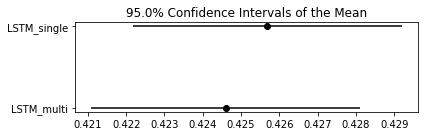

In [15]:
#plt.figure(figsize=(5, 10))
plot_stats(result)
plt.tight_layout()
#figname = "Plots/CVD_EVENT_Confidence_Intervals_of_the_mean.png"
#plt.savefig(figname)
plt.show()

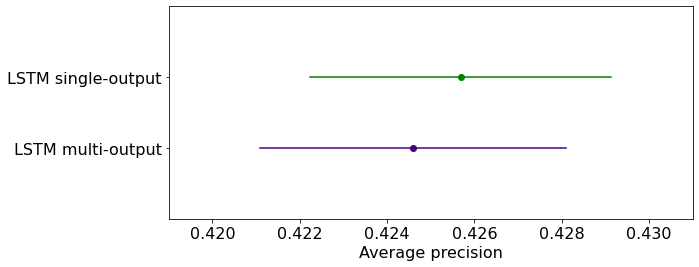

In [19]:
plt.rcParams.update({'font.size':16})

plt.figure(figsize=(10, 4))
plt.ylim([0, 3])
plt.xlim([0.419, 0.431])
plt.yticks([1,2], ['LSTM multi-output', 'LSTM single-output'])

plt.plot(0.425688, 2, marker='o', color='g')
plt.plot([0.422245, 0.429131], [2, 2], linestyle = '-', color='g')
plt.plot(0.424596 , 1, marker='o', color='indigo')
plt.plot([0.421082, 0.428109], [1, 1], linestyle = '-', color='indigo')
plt.xlabel("Average precision")
plt.tight_layout()
figname = "Plots/CVD_EVENT_IFC_patched_confidence_intervals_of_the_mean_colours_multi_I.png"
plt.savefig(figname)
plt.show()